In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
fileName = "/content/drive/MyDrive/Ex1/Dataset/ember2018/train_features_0_2_copy.jsonl"

# 1.1 An insight into dataset (Raw dataset)

Feature information

From paper: [Identifying Useful Features for Malware Detection(2019)](https://ieeexplore.ieee.org/document/8951564)

<center>
  <img src="https://i.imgur.com/9qoKFy9.png" alt="feat-info">
</center>

In [ ]:
def JSONConverter(file):
  with open(file, 'r') as f:
    raw_file = f.read()
    # Ad delimiter ',' between objects
    raw_file = raw_file.replace("\n", ',') 
    raw_file = raw_file[:len(raw_file) - 1] # You should minus by 'N'. In this case, it is only '1'
    # After converting, there would be N commas ',' at the end if your file ending character is also N newline characters '\n', we need to exclude it.
    # Also, you should debug with HxD (Hex Editor) to see your raw file.

    # These object should be closed by 'list'; otherwise, the JSON format would not be recognize
    raw_file = "[" + raw_file + "]"
  return raw_file

In [ ]:
import json

JsonString = JSONConverter(fileName)

# write to file for testing
with open("/content/drive/MyDrive/Ex1/Dataset/ember2018/formatted_JSON.json", "w") as file: 
  file.write(JsonString)

JsonObject = json.loads(JsonString)

In [ ]:
JsonObject[0]

{'sha256': '0abb4fda7d5b13801d63bee53e5e256be43e141faa077a6d149874242c3f02c2',
 'md5': '63956d6417f8f43357d9a8e79e52257e',
 'appeared': '2006-12',
 'label': 0,
 'avclass': '',
 'histogram': [45521,
  13095,
  12167,
  12496,
  12429,
  11709,
  11864,
  12057,
  12881,
  11798,
  11802,
  11783,
  12029,
  12081,
  11756,
  12532,
  11980,
  11628,
  11504,
  11715,
  11809,
  12414,
  11779,
  11708,
  11956,
  11622,
  11859,
  11775,
  11717,
  11507,
  11873,
  11781,
  12015,
  11690,
  11676,
  11782,
  11820,
  11859,
  12025,
  11786,
  11731,
  11445,
  11556,
  11676,
  12057,
  11636,
  11669,
  11903,
  12004,
  11741,
  11833,
  12329,
  11778,
  11859,
  11806,
  11586,
  11775,
  11885,
  11863,
  12047,
  11869,
  12077,
  11724,
  12037,
  13129,
  11931,
  12101,
  12202,
  11956,
  12625,
  11877,
  11804,
  11999,
  11869,
  11578,
  11591,
  11933,
  12020,
  11695,
  11915,
  12565,
  11755,
  11597,
  12224,
  11786,
  11709,
  12321,
  12325,
  11671,
  11624,
 

## a. Show all available properties of an Object

In [ ]:
list_feature_object = JsonObject[0].keys()
list_feature_object

dict_keys(['sha256', 'md5', 'appeared', 'label', 'avclass', 'histogram', 'byteentropy', 'strings', 'general', 'header', 'section', 'imports', 'exports', 'datadirectories'])

In [ ]:
len(list_feature_object) # Total number of properties

14

## b. Show label's info

In [ ]:
label_list = []

# List all labels's values
for item in JsonObject:
  label_list.append(item["label"])

label_list

In [ ]:
len(label_list) # Total used samples

19626

In [ ]:
import numpy as np

# Show all possible value of 'label' and their frequency
np.unique(label_list, return_counts=True)

(array([-1,  0,  1]), array([ 2698, 13397,  3531]))

## c. Converting to DataFrame and Preprocessing

In [ ]:
import pandas as pd

df = pd.DataFrame(JsonObject)

## d. Show relevant statistics

In [ ]:
df.shape # -> (a, b): a samples, b properties

(19626, 14)

In [ ]:
df.size # Size on disk of DataFrame

274764

In [ ]:
df.head(5) # Overview in our data

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,63956d6417f8f43357d9a8e79e52257e,2006-12,0,,"[45521, 13095, 12167, 12496, 12429, 11709, 118...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 14573, 'avlength': 5.9720716393...","{'size': 3101705, 'vsize': 380928, 'has_debug'...","{'coff': {'timestamp': 1124149349, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['SetFileTime', 'CompareFileT...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,6f7bde7a1126debf0cc359a54953efc1,2007-01,0,,"[93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...","[47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 1803, 'avlength': 11.1913477537...","{'size': 504320, 'vsize': 524288, 'has_debug':...","{'coff': {'timestamp': 1091600092, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...",{'ADVAPI32.dll': ['ConvertStringSecurityDescri...,[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
2,eac8ddb4970f8af985742973d6f0e06902d42a3684d791...,7520c8f9534ca818726a4feaebf49e2b,2007-02,0,,"[45369, 2560, 1233, 1542, 4234, 515, 613, 1542...","[6144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 1238, 'avlength': 12.0201938610...","{'size': 180224, 'vsize': 180224, 'has_debug':...","{'coff': {'timestamp': 892092777, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegSetValueExA', 'RegDelete...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,e435a536968941854bcec3b902c439f6,2007-02,0,,"[21315, 9641, 9332, 9358, 9598, 9220, 9146, 93...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 11166, 'avlength': 5.8078989790...","{'size': 2377730, 'vsize': 77824, 'has_debug':...","{'coff': {'timestamp': 708992537, 'machine': '...","{'entry': 'CODE', 'sections': [{'name': 'CODE'...","{'kernel32.dll': ['DeleteCriticalSection', 'Wr...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,e93049e2df82ab26f35ad0049173cb14,2007-02,0,,"[23539, 6015, 5214, 4727, 4892, 4649, 4367, 52...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 5547, 'avlength': 6.04344690823...","{'size': 1153808, 'vsize': 1167360, 'has_debug...","{'coff': {'timestamp': 938258311, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegCloseKey', 'AllocateAndI...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
5,f725cee174223b6fbc49e2ba9a30c69c48b548fc5b382f...,4235e2d487958ff377f0f92b266591f0,2007-04,0,,"[11253, 6435, 6185, 6462, 6157, 6339, 6374, 63...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 7652, 'avlength': 5.78855201254...","{'size': 1643293, 'vsize': 28672, 'has_debug':...","{'coff': {'timestamp': 956673432, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['lstrcpyA', 'GetCommandLineA...","[_MainWndProc@16, _StubFileWrite@12]","[{'name': 'EXPORT_TABLE', 'size': 105, 'virtua..."
6,9997044147ec7f5ede801c6cdcc164f70273b14a6c23ac...,e4647acec12b82944f5df603dc682660,2007-08,0,,"[32554, 25851, 25537, 25878, 25981, 25928, 257...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 30493, 'avlength': 5.6464762404...","{'size': 6527592, 'vsize': 135168, 'has_debug'...","{'coff': {'timestamp': 1155680870, 'machine': ...","{'entry': 'UPX0', 'sections': [{'name': 'UPX0'...","{'KERNEL32.DLL': ['LoadLibraryA'], 'COMCTL32.d...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
7,2fcc0cdc69773cd830805147fb6a81af34c14725a5a4cf...,6524a10da9701301b2582f12cc66f90c,2007-08,0,,"[20612, 324, 167, 166, 282, 80, 65, 38, 276, 5...","[12288, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 148, 'avlength': 13.56756

In [ ]:
df.isna() # Check whether a specific cell contains 'NaN' value

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19621,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19622,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19623,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19624,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

sha256             0
md5                0
appeared           0
label              0
avclass            0
histogram          0
byteentropy        0
strings            0
general            0
header             0
section            0
imports            0
exports            0
datadirectories    0
dtype: int64

In [ ]:
df.describe(include='all') # Show information about some special values to understand our data

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
count,19626,19626,19626,19626.000000,19626,19626,19626,19626,19626,19626,19626,19626,19626,19626
unique,19626,19626,100,NaN,452,19625,19482,18377,15198,14447,17210,8676,2525,16122
top,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,63956d6417f8f43357d9a8e79e52257e,2018-03,NaN,,"[116986, 28408, 24144, 23882, 19316, 20018, 19...","[10240, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 4, 'avlength': 14.25, 'printabl...","{'size': 2048, 'vsize': 8192, 'has_debug': 0, ...","{'coff': {'timestamp': 1511340343, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...",{},[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
freq,1,1,9947,NaN,15141,2,61,81,164,509,504,3025,15623,209
mean,NaN,NaN,NaN,0.042444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.561783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info() # Show columns's information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19626 entries, 0 to 19625
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sha256           19626 non-null  object
 1   md5              19626 non-null  object
 2   appeared         19626 non-null  object
 3   label            19626 non-null  int64 
 4   avclass          19626 non-null  object
 5   histogram        19626 non-null  object
 6   byteentropy      19626 non-null  object
 7   strings          19626 non-null  object
 8   general          19626 non-null  object
 9   header           19626 non-null  object
 10  section          19626 non-null  object
 11  imports          19626 non-null  object
 12  exports          19626 non-null  object
 13  datadirectories  19626 non-null  object
dtypes: int64(1), object(13)
memory usage: 2.1+ MB


# 1.2 An insight into dataset (Extracted Dataset) 

Admit the dataset by [Quynh Trinh](https://ieee-dataport.org/authors/quynh-trinh) in the given following link: [Maliciou_Benign_PE_file_dataset](https://l.facebook.com/l.php?u=https%3A%2F%2Fdrive.google.com%2Fdrive%2Ffolders%2F1rXmo01fzWFgnUD0OF2qsphHWwV-1qtLg%3Fusp%3Dsharing%26fbclid%3DIwAR0EM2wxEJ8OAn9SCnPY2rppmU6nDbQZHvm8scXODBYms5En70hOfFVVF9E&h=AT1EoZprx4z879vFt5sUHcorjmaGs0uf9koP-mxH_3VZvY4RCVptCO5x4J1d_m60VftpjPwhOSMirbADezsPeRCzvlR9U9EdkzGgye7EgXk_ZZiwkBedui6O4vQcyeyNnpZYAdjEAQftCIh1QCMMYA)

In [ ]:
import pandas as pd 

df_main = pd.read_csv("/content/drive/MyDrive/Ex1/Dataset/ember2018/ember_sample_test.csv")

FileNotFoundError: ignored

In [ ]:
import numpy as np
np.unique(df_main['label'], return_counts=True) # Show unique label's values and their frequency

(array([0, 1]), array([382, 617]))

In [ ]:
df_main = df_main.drop(['sha256', 'appeared'], axis=1)

In [ ]:
df_main_train = df_main.drop("label", axis=1)

In [ ]:
feature_list = []
for feature in df_main.columns:
  feature_list.append(feature)

with open("/content/drive/MyDrive/Ex1/Dataset/ember2018/feature_list.txt", 'w') as file:
  file.write(str(feature_list))


In [ ]:
df_main.shape # -> (a, b): a samples, b properties

(999, 1001)

In [ ]:
df_main.size # Size on disk of DataFrame

999999

In [ ]:
df_main.isna().sum()

In [ ]:
df_main.isna() # Check whether a specific cell contains 'NaN' value

,label,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,...,DuplicateToken,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_main.head(5) # Overview in our data

,label,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,...,DuplicateToken,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_main.describe(include='all') # Show information about some special values to understand our data

,label,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,...,DuplicateToken,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.0,999.000000,999.000000
mean,0.617618,0.332332,0.216216,0.172172,0.237237,0.214214,0.148148,0.217217,0.107107,0.161161,...,0.011011,0.008008,0.010010,0.108108,0.027027,0.010010,0.004004,0.0,0.013013,0.003003
std,0.486213,0.471285,0.411870,0.377719,0.425602,0.410482,0.355425,0.412558,0.309404,0.367864,...,0.104406,0.089173,0.099598,0.310672,0.162243,0.099598,0.063182,0.0,0.113387,0.054745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [ ]:
df_main.info() # Show columns's information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 1001 entries, label to LookupAccountSidW
dtypes: int64(1001)
memory usage: 7.6 MB


# 2. Feature Selection

In [ ]:
df_main['label']

0      1
1      1
2      1
3      1
4      0
      ..
994    1
995    1
996    0
997    1
998    1
Name: label, Length: 999, dtype: int64

## a. Filter Method

Summary: 
- At the end, our result minimize the number of features to `229`
- Our strategies in feature importance is noted in `.DOC` file

Filter Selection Select independent features with:
- No constant Variables
- No/less Quadi-constant variables
- No Duplicate Rows
- High correlation with the target variable
- Low correlation with another independent variable
- Higher information gain or mutual information of the independent variable.

Reference: https://medium.com/mlearning-ai/feature-selection-using-filter-method-python-implementation-from-scratch-375d86389003

### i. Removing Constant features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold = 0)

# Fit and transforming on train data
data_constant = constant_filter.fit_transform(df_main_train)
print("Constant data:")
print(data_constant)
print("Constant data's shape:")
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in df_main_train.columns
                    if column not in df_main_train.columns[constant_filter.get_support()]]
print("\nColumns name contains constant data(total: %d): " %(len(constant_columns)))
print(constant_columns)

Constant data:
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Constant data's shape:
(999, 956)

Columns name contains constant data(total: 44): 
['OleCreateFontIndirect', 'LoadRegTypeLib', 'VarUI4FromStr', 'VarBstrCat', 'VarBstrCmp', 'AccessibleObjectFromWindow', 'NetWkstaGetInfo', 'OleDraw', 'SetMenuItemInfoA', 'IsAccelerator', 'GetDCPenColor', 'FindTextA', 'ReplaceTextA', 'PageSetupDlgA', 'SetErrorInfo', 'NtUnmapViewOfSection', 'SysAllocStringByteLen', 'WSAGetLastError', 'SysStringByteLen', 'DispCallFunc', 'ioctlsocket', 'setsockopt', 'LookupPrivilegeNameW', 'ConvertToAutoInheritPrivateObjectSecurity', 'AddAccessAllowedObjectAce', 'AccessCheckByTypeResultListAndAuditAlarmW', 'AccessCheckByTypeResultList', 'AccessCheckByTypeAndAuditAlarmW', 'AddAccessAllowedAceEx', 'AddAuditAccessAceEx', 'AddAuditAccessAce', 'AccessCheckByTypeResultListAndAuditAlarmA', 'AddAuditAccessObjectAce', 'AdjustTokenGroups', 'CloseEventL

In [ ]:
df_main_train = df_main_train.drop(constant_columns,axis=1)
df_main_train.shape

(999, 956)

### ii. Removing Quasi-Constant Features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

nearly_constant_filter = VarianceThreshold(threshold = 0.01)

# Fit and transforming on train data
data_nearly_constant = nearly_constant_filter.fit_transform(df_main_train)
print("Nearly-constant data:")
print(data_nearly_constant)
print("Nearly-constant data's shape:")
print(data_nearly_constant.shape)

#Extracting all constant columns using get support function of our filter
nearly_constant_columns = [column for column in df_main_train.columns
                    if column not in df_main_train.columns[nearly_constant_filter.get_support()]]
print("\nColumns name contains nearly-constant data(total: %d): " %(len(nearly_constant_columns)))
print(nearly_constant_columns)

Nearly-constant data:
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]]
Nearly-constant data's shape:
(999, 612)

Columns name contains nearly-constant data(total: 344): 
['VariantInit', 'VariantClear', 'SysAllocStringLen', 'GetClassInfoExW', 'EnumSystemLocalesW', 'EqualRect', 'FindFirstFileExW', 'CoGetClassObject', 'VariantCopy', 'SysAllocString', 'SysStringLen', 'ClosePrinter', 'LoadTypeLib', 'SysReAllocStringLen', 'IsZoomed', 'GetClipBox', 'RegEnumKeyW', 'InterlockedPushEntrySList', 'OleLockRunning', 'CoTaskMemRealloc', 'GetTopWindow', 'SetThreadLocale', 'CreateHalftonePalette', 'GlobalDeleteAtom', 'DrawIconEx', 'SetWindowOrgEx', 'RectVisible', 'DrawFrameControl', 'InterlockedPopEntrySList', 'SafeArrayGetUBound', 'SafeArrayCreate', 'SafeArrayGetLBound', 'GetIconInfo', 'SetPixel', 'SafeArrayPtrOfIndex', 'ImageList_Remove', 'EnumThreadWindows', 'ExcludeClipRect', 'GetScrollPos', 'DrawEdge', 'ImageList_BeginDrag', 'G

In [ ]:
df_main_train = df_main_train.drop(nearly_constant_columns, axis=1)
df_main_train.shape

(999, 612)

### iii. Removing Duplicate Columns


In [ ]:
df_main_train_T = df_main_train.T
df_main_train_T.shape

(612, 999)

In [ ]:
df_main_train_T.duplicated().sum()

31

In [ ]:
df_main_train = df_main_train_T.drop_duplicates().T
df_main_train.shape

(999, 581)

How to choose the most suitable algorithm for determining the feature's correlation

In this excercise, I would try the first recommended method: Pearson's coefficient

Source: https://medium.com/analytics-vidhya/feature-selection-in-machine-learning-ec1f5d053007

![images](https://i.imgur.com/tTL6tuq.png)

Create pairs value (X,y) for getting coefficient

In [ ]:
X = df_main_train
print(X.shape)
y= df_main["label"]
print(y.shape)

(999, 581)
(999,)


In [ ]:
full_data= X.copy()
full_data["label"]= y

In [ ]:
# Use Pearson's coefficient for feature selection
imp = full_data.drop("label", axis=1).apply(lambda x: x.corr(full_data.label, method='pearson')) 
imp

GetProcAddress     -0.017706
ExitProcess         0.002975
WriteFile          -0.154024
GetLastError       -0.214873
CloseHandle        -0.151470
                      ...   
SetFileSecurityA    0.083025
DuplicateToken      0.043547
WinHttpOpen         0.273944
_controlfp         -0.097497
GetTimeFormatW     -0.073229
Length: 581, dtype: float64

In [ ]:
import numpy as np

indices = np.argsort(imp)
indices['WriteFile']

363

In [ ]:
imp[indices]    # Sorted in ascending order

QueryPerformanceCounter   -0.417110
GetCurrentThreadId        -0.416901
GetCurrentThread          -0.411448
_initterm                 -0.400998
GetSystemTime             -0.398665
                             ...   
wsprintfA                  0.187561
CryptHashData              0.252538
CreateStreamOnHGlobal      0.261702
WinHttpOpen                0.273944
LoadLibraryA               0.329393
Length: 581, dtype: float64

Plotting for Visualization

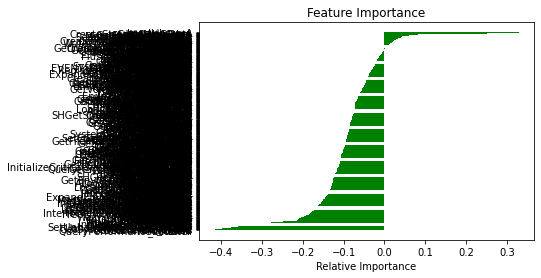

In [ ]:
import matplotlib.pyplot as plt

names = X.columns
plt.title('Feature Importance')

# Plotting horizontal bar graph
plt.barh(range(len(indices)), imp[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
feat_imp_list = []
for i in range(0, len(indices)):
    if np.abs(imp[i])>0.1:
        feat_imp_list.append(names[i])       

In [ ]:
len(feat_imp_list) 

245

In [ ]:
X_new = X[feat_imp_list] # Producing new list of features for real-model training
X_new.shape

(999, 245)

## b. Wrapper Method

In [ ]:
# Initialize the pairs (X,y) 
X = df_main_train 
print(X.shape)
y= df_main["label"]
print(y.shape)

(999, 581)
(999,)


### i. Sequential Forward Selection

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

*Sequential Feature Selector* is a strategy for choosing a best-performance subset of features. This includes 4 main implementations:
- Sequential Forward Selection (SFS)
- Sequential Backward Selection (SBS)
- Sequential Backward Floating Selection (SBFS)
- Sequential Forward Floating Selection (SFFS)


We use `sklearn` to take our experiments into actions

Reference (Full explanation): 
- http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/ 
- Evaluation score (`scoring`): https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# Using K-nearest neighbors algorithm
sfs = SequentialFeatureSelector(knn, 
                                n_features_to_select=20,
                                direction='forward',
                                scoring='accuracy') # The number of features in ouput subset. This should be "half" of the input features

sfs.fit(X, y)


In [ ]:
import numpy as np
index_array = np.where(sfs.get_support() == True)
index_array

(array([  2,   4,   9,  85, 134, 160, 265, 287, 328, 391, 404, 517, 531,
        568, 631, 669, 814, 863, 882, 991]),)

In [ ]:
extracted_feature = X.columns[index_array]
extracted_feature

Index(['WriteFile', 'CloseHandle', 'GetCurrentThreadId', 'GetTickCount',
       'IsChild', 'EnumWindows', 'CreatePalette', 'InterlockedPushEntrySList',
       'IsDialogMessageA', 'UnrealizeObject', 'ImageList_GetDragImage',
       'CreateRectRgn', 'VerifyVersionInfoW', 'GetTextExtentPoint32A',
       'VirtualQueryEx', 'Chord', 'GetShortPathNameW', 'connect', '_initterm',
       'bind'],
      dtype='object')

In [ ]:
len(extracted_feature)

20

In [ ]:
X_new = pd.DataFrame(X, columns=list(extracted_feature)) # Producing new list of features for real-model training
X_new

,WriteFile,CloseHandle,GetCurrentThreadId,GetTickCount,IsChild,EnumWindows,CreatePalette,InterlockedPushEntrySList,IsDialogMessageA,UnrealizeObject,ImageList_GetDragImage,CreateRectRgn,VerifyVersionInfoW,GetTextExtentPoint32A,VirtualQueryEx,Chord,GetShortPathNameW,connect,_initterm,bind
0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## c. Intrinsic(Embedded) Method

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: ignored

### i. Lasso algorithm

In [ ]:
from sklearn.linear_model import LassoCV

lasso_reg_cv = LassoCV(max_iter=100)
lasso_reg_cv.fit(X_train, y_train)

print("Best alpha using built-in LassoCV: %f" % lasso_reg_cv.alpha_)
print("Best score using built-in LassoCV: %f" % lasso_reg_cv.score(X_train,y_train))
print('Best testing score using built-in LassoCV: %f' % lasso_reg_cv.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.041177926307760515, tolerance: 0.015106416275430355
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06090335670246816, tolerance: 0.015106416275430355
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039299600036798665, tolerance: 0.015106416275430355
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

Best alpha using built-in LassoCV: 0.002235
Best score using built-in LassoCV: 0.550805
Best testing score using built-in LassoCV: 0.476052


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5530055964207463, tolerance: 0.015049374999999999
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8444067818084307, tolerance: 0.015049374999999999
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.160e-01, tolerance: 1.871e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
from sklearn import metrics

y_pred = lasso_reg_cv.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2834651083665724
Mean Squared Error: 0.1272014980163987
Root Mean Squared Error: 0.35665319011106394


Get coefficient of each features after training for **feature selection**

In [ ]:
coef = pd.Series(lasso_reg_cv.coef_, index = X_train.columns)
coef

GetProcAddress     -0.051668
ExitProcess        -0.001574
WriteFile          -0.000000
GetLastError        0.000000
CloseHandle         0.060437
                      ...   
SetFileSecurityA    0.382338
DuplicateToken      0.000000
WinHttpOpen         0.279973
_controlfp          0.000000
GetTimeFormatW     -0.000000
Length: 581, dtype: float64

Visualize data of features by **Horizontal Bar Chart**

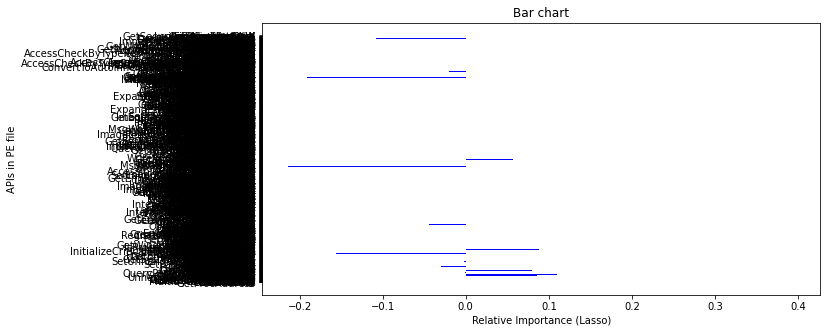

In [ ]:
import matplotlib.pyplot as plt

variables = coef.index
values = coef.values
 
fig = plt.figure(figsize=(10, 5))
 
# creating the bar plot
plt.barh(variables, values, color='blue')
 
plt.xlabel("Relative Importance (Lasso)")
plt.ylabel("APIs in PE file")
plt.title("Bar chart")
plt.show()

In [ ]:
extracted_feat = coef.where(coef > 0).dropna()
extracted_feat

CloseHandle                  0.060437
VirtualAlloc                 0.216212
ReadFile                     0.125749
RaiseException               0.006771
GetModuleHandleW             0.008588
GetCurrentProcessId          0.085219
CreateFileW                  0.109653
SetLastError                 0.035124
GetCommandLineW              0.008029
GetModuleHandleA             0.079842
IsWindow                     0.025152
LoadLibraryA                 0.396409
RegOpenKeyExW                0.086525
CreateCompatibleBitmap       0.087823
IsProcessorFeaturePresent    0.053241
GetWindowThreadProcessId     0.060508
PostMessageW                 0.174395
CreateStreamOnHGlobal        0.094002
UnregisterClassW             0.001322
lstrlenA                     0.003163
InterlockedExchange          0.003819
DefWindowProcA               0.092492
Rectangle                    0.057368
CreateProcessA               0.056322
ShellExecuteA                0.184437
SetFileAttributesA           0.016507
ExpandEnviro

In [ ]:
len(extracted_feat)

33

In [ ]:
X_new = pd.DataFrame(df_main_train, columns=list(extracted_feat.index)) # Producing new list of features for real-model training
X_new.shape

(999, 33)

In [ ]:
X_new

,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,FindClose,LeaveCriticalSection,...,GetCurrentDirectoryA,free,_cexit,malloc,_XcptFilter,CreateFileMappingA,_onexit,InitializeAcl,DosDateTimeToFileTime,WinHttpOpen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ii. Ridge algorithm

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_reg_cv = RidgeCV()
ridge_reg_cv.fit(X_train, y_train)

print("Best alpha using built-in RidgeCV: %f" % ridge_reg_cv.alpha_)
print("Best training score using built-in RidgeCV: %f" % ridge_reg_cv.score(X_train,y_train))
print('Best testing score using built-in RidgeCV: %f' % ridge_reg_cv.score(X_test,y_test))

coef = pd.Series(ridge_reg_cv.coef_, index = X_train.columns)


NameError: ignored

In [ ]:
from sklearn import metrics

y_pred = ridge_reg_cv.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.26451189885749415
Mean Squared Error: 0.11885881401650629
Root Mean Squared Error: 0.3447590666197283


In [ ]:
coef = pd.Series(ridge_reg_cv.coef_, index = X_train.columns)
coef

GetProcAddress              -0.029344
ExitProcess                 -0.067401
WriteFile                    0.003255
GetLastError                 0.019585
CloseHandle                  0.098037
                               ...   
WinExec                     -0.037443
GetSecurityDescriptorDacl   -0.013255
FindFirstFreeAce             0.000000
GetTimeFormatW              -0.005259
LookupAccountSidW            0.032557
Length: 1000, dtype: float64

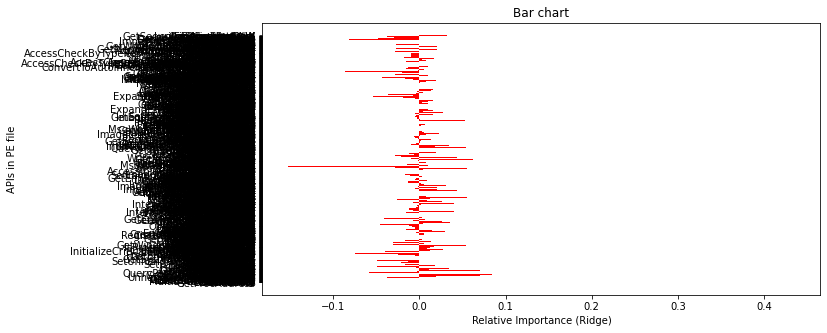

In [ ]:
import matplotlib.pyplot as plt

variables = coef.index
values = coef.values
 
fig = plt.figure(figsize=(10, 5))
 
# creating the bar plot
plt.barh(variables, values, color='red')
 
plt.xlabel("Relative Importance (Ridge)")
plt.ylabel("APIs in PE file")
plt.title("Bar chart")
plt.show()

In [ ]:
extracted_feat = coef.where(coef > 0.1).dropna()
extracted_feat

VirtualAlloc             0.210061
ReadFile                 0.101075
LoadLibraryA             0.435765
CreateStreamOnHGlobal    0.159498
ShellExecuteA            0.111627
_allmul                  0.148229
SetFileSecurityA         0.157356
WinHttpOpen              0.156822
dtype: float64

In [ ]:
len(extracted_feat)

8

In [ ]:
X_new = pd.DataFrame(df_main_train, columns=list(extracted_feat.index))
X_new.shape

(999, 8)

In [ ]:
X_new

### iii. Elastic Net algorithm

In [ ]:
from sklearn.linear_model import ElasticNetCV

ElaNet_reg_cv = ElasticNetCV(max_iter=100) # '100' is preferred
ElaNet_reg_cv.fit(X_train, y_train)

print("Best alpha using built-in ElasticNetCV: %f" % ElaNet_reg_cv.alpha_)
print("Best training score using built-in ElasticNetCV: %f" % ElaNet_reg_cv.score(X_train,y_train))
print('Best testing score using built-in ElasticNetCV: %f' % ElaNet_reg_cv.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.072e-02, tolerance: 1.511e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.055e-02, tolerance: 1.511e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Best alpha using built-in ElasticNetCV: 0.004170
Best training score using built-in ElasticNetCV: 0.549465
Best testing score using built-in ElasticNetCV: 0.473196


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.315e+00, tolerance: 1.505e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.583e+00, tolerance: 1.505e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [ ]:
from sklearn import metrics
import numpy as np

y_pred = ElaNet_reg_cv.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2853527660732317
Mean Squared Error: 0.12789473294180298
Root Mean Squared Error: 0.35762373095448097


In [ ]:
coef = pd.Series(ElaNet_reg_cv.coef_, index = X_train.columns)
coef

GetProcAddress              -0.044960
ExitProcess                 -0.004293
WriteFile                   -0.000000
GetLastError                 0.000000
CloseHandle                  0.056029
                               ...   
WinExec                     -0.000000
GetSecurityDescriptorDacl   -0.000000
FindFirstFreeAce             0.000000
GetTimeFormatW              -0.000000
LookupAccountSidW            0.000000
Length: 1000, dtype: float64

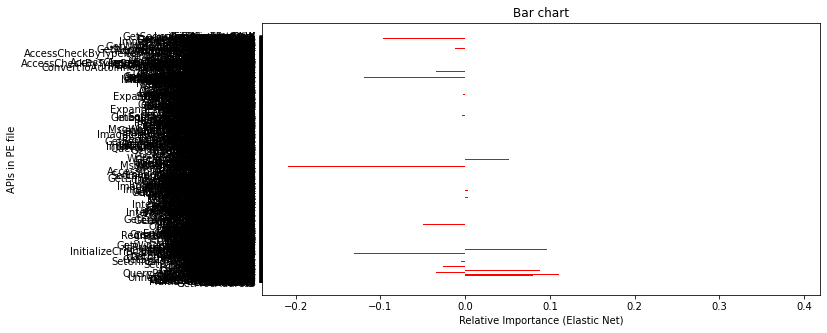

In [ ]:
import matplotlib.pyplot as plt

variables = coef.index
values = coef.values
 
fig = plt.figure(figsize=(10, 5))
 
# creating the bar plot
plt.barh(variables, values, color='red')
 
plt.xlabel("Relative Importance (Elastic Net)")
plt.ylabel("APIs in PE file")
plt.title("Bar chart")
plt.show()

In [ ]:
extracted_feat = coef.where(coef > 0.1).dropna()
extracted_feat

VirtualAlloc             0.190542
ReadFile                 0.124677
CreateFileW              0.110522
LoadLibraryA             0.389411
PostMessageW             0.132717
CreateStreamOnHGlobal    0.115019
ShellExecuteA            0.164842
SetFileSecurityA         0.268079
WinHttpOpen              0.235497
dtype: float64

In [ ]:
len(extracted_feat)

9

In [ ]:
X_new = pd.DataFrame(df_main_train, columns=list(extracted_feat.index))
X_new.shape

(999, 9)

In [ ]:
X_new

,VirtualAlloc,ReadFile,CreateFileW,LoadLibraryA,PostMessageW,CreateStreamOnHGlobal,ShellExecuteA,SetFileSecurityA,WinHttpOpen
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
994,1,1,0,1,0,0,0,0,0
995,0,0,0,1,0,1,0,0,1
996,0,0,0,0,0,0,0,0,0
997,1,0,0,0,0,0,0,0,0


# 3. Conduct experiments in real model 

In [ ]:
X_new.shape # Use any strategy in the listed one above to get efficiently extracted new set of feature 'X_new'

(999, 9)

In [ ]:
y.shape

(999,)

## 1. Machine Learning model (GradientBoostingClassifier)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Default: 
# learning_rate = 0.1
# n_estimators = 100

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Accuracy: ", round((tp + tn) / (tp + tn + fp + fn), 8))
print('False positive rate(FPR): ', round(fp / (fp + tn), 8))
print('False negative rate(FN): ', round(fn / (fn + tp), 8))
recall = round(tp / (tp + fn), 8)
print('Recall(TPR): ', recall)
precision = round(tp / (tp + fp), 8)
print('Precision: ', precision)
print('F1 score: ', round((2 * precision * recall) / (precision + recall), 8))

Accuracy:  0.82
False positive rate(FPR):  0.08433735
False negative rate(FN):  0.24786325
Recall(TPR):  0.75213675
Precision:  0.92631579
F1 score:  0.83018868


## 2. Deep Learning(DL) model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
input_shape_train = X_new.shape[1] # Define the exact input_shape parameter

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(9,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_new, y, epochs=150, batch_size=10)

Epoch 1/150


ValueError: ignored

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_new, y)
print('Accuracy: %.2f' % (accuracy))

NameError: ignored

In [ ]:
# make probability predictions with the model
y_pred = model.predict(X_new)

32/32 [==============================] - 0s 2ms/step


In [ ]:
from tensorflow.keras.metrics import Accuracy
m = Accuracy()
m.update_state(y_test, y_pred)
m.result().numpy()

0.015

In [ ]:
from tensorflow.keras.metrics import Recall
m = Recall()
m.update_state(y_test, y_pred)
m.result().numpy()

0.7606838

In [ ]:
from tensorflow.keras.metrics import Precision
m = Precision()
m.update_state(y_test, y_pred)
m.result().numpy()

0.9468085